### **边缘检测原理**

* 图像边缘指图像中灰度值突然发生变化的区域，图像的每一行像素和每一列像素都描述成一个关于灰度值的函数，那么变化趋势可以用图像的导数来表示

* 图像边缘为用户曲线变化最陡峭的区域，最大值所在区域为图像中边缘的所在区域

* 表示图像的梯度，方法为求取前一个像素和后一个像素的灰度差值$$\frac{\mathrm{d} f(x,y)}{\mathrm{d} x} =\frac{f(x+1,y)-f(x-1,y)}{2} $$

* 在图像的边缘，像素值有可能由高变低，也有可能由低变高，正数值表示由低变高，负数值表示由高变低，需要对计算结果求取绝对值

* 图像的边缘包括x方向的边缘和y方向的边缘，因此分别求取两个方向的边缘相加，得到整幅图像的边缘

In [32]:
# 示例代码利用cv.filater2D()函数实现边缘检测，由于求取结果有负数，不在uint8范围内，因此滤波后图像类型用cv.CV_16S

In [33]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [34]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'equalLena.png', cv.IMREAD_ANYCOLOR)
if img is None:
    print('Failed to read equalLena.png')
    sys.exit

In [35]:
# 为了更好地展现边缘提取，此处定义函数使图像反向
def image_invert(img):
    h, w = img.shape[:2]  # 图片的高度和宽度
    imgInv = np.empty((w, h), np.uint8)  # 创建空白数组
    for i in range(h):
        for j in range(w):
            imgInv[i][j] = 255 - img[i][j]
    return imgInv

In [36]:
# 创建边缘检测滤波器
kernel1 = np.array([1, -1])
kernel2 = np.array([1, 0, -1])
kernel3 = kernel2.reshape((3, 1))
# Roberts算子
kernel4 = np.array([1, 0, 0, -1]).reshape(2, 2)
kernel5 = np.array([0, -1, 1, 0]).reshape(2, 2)

In [37]:
# 检测图像边缘
# 使用[1, -1]检测水平方向边缘
res1 = cv.filter2D(img, cv.CV_16S, kernel1)
res1 = cv.convertScaleAbs(res1)
res1 = image_invert(res1)
# 使用[1, 0, -1]检测水平方向边缘
res2 = cv.filter2D(img, cv.CV_16S, kernel2)
res2 = cv.convertScaleAbs(res2)
res2 = image_invert(res2)
# 使用[1, 0, -1]检测垂直方向边缘
res3 = cv.filter2D(img, cv.CV_16S, kernel3)
res3 = cv.convertScaleAbs(res3)
res3 = image_invert(res3)
# 整幅图像的边缘
res = res2 + res3
# 检测由左上到右下的边缘
res4 = cv.filter2D(img, cv.CV_16S, kernel4)
res4 = cv.convertScaleAbs(res4)
res4 = image_invert(res4)
# 检测由右上到左下的边缘
res5 = cv.filter2D(img, cv.CV_16S, kernel5)
res5 = cv.convertScaleAbs(res5)
res5 = image_invert(res5)

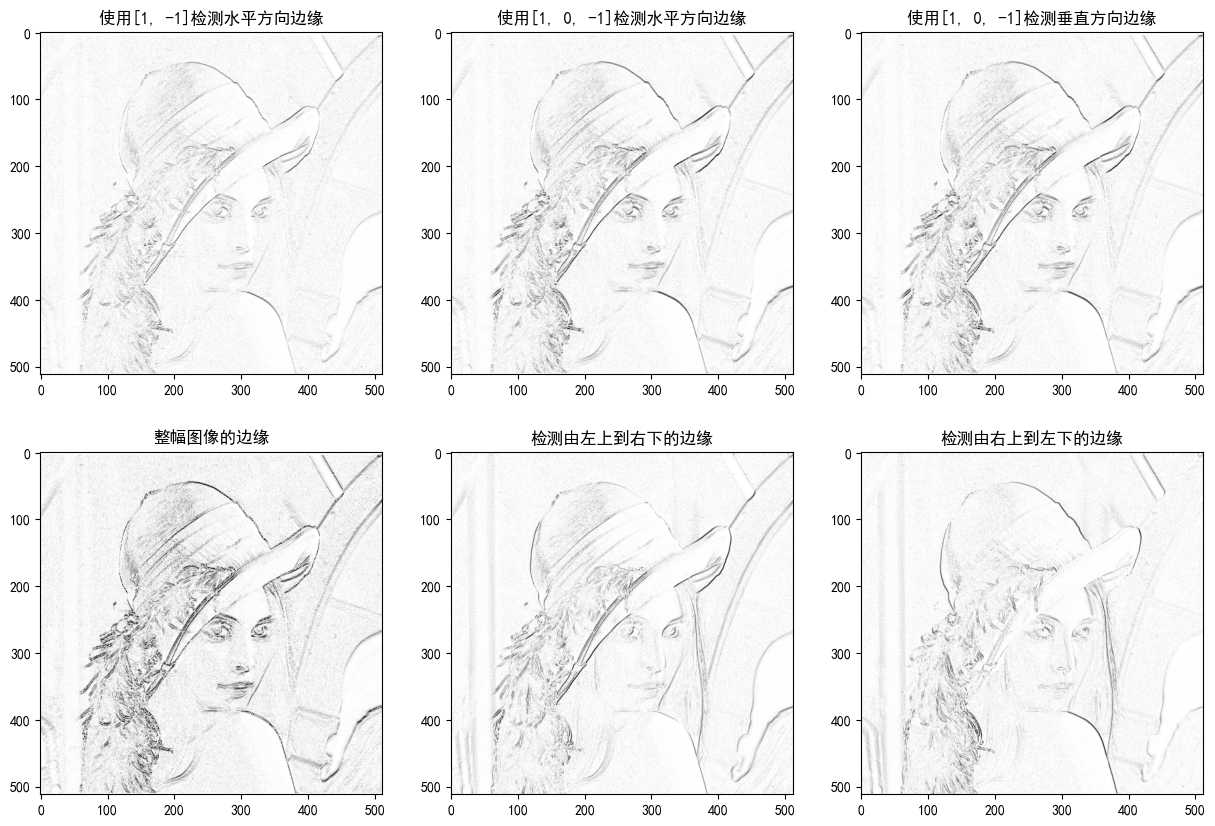

In [38]:
# 展示结果
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.title('使用[1, -1]检测水平方向边缘')
plt.imshow(res1, cmap='gray')
plt.subplot(2, 3, 2)
plt.title('使用[1, 0, -1]检测水平方向边缘')
plt.imshow(res2, cmap='gray')
plt.subplot(2, 3, 3)
plt.title('使用[1, 0, -1]检测垂直方向边缘')
plt.imshow(res3, cmap='gray') 
plt.subplot(2, 3, 4)
plt.title('整幅图像的边缘')
plt.imshow(res, cmap='gray')
plt.subplot(2, 3, 5)
plt.title('检测由左上到右下的边缘')
plt.imshow(res4, cmap='gray')
plt.subplot(2, 3, 6)
plt.title('检测由右上到左下的边缘')
plt.imshow(res5, cmap='gray')